# Job prospects after graduation 

The aim of this project is to visually explore the variations in salary for university graduates of universitied in the United States of America (US). 
The primary aim is to use quantitative data to determine which is the most efficient major from different metrics. 

This project is essentially concerned with visualizing the data, and can be seen as a first step towards a more ambitiou analysis which could provide, for instance, a model to select the optimal majo for a student given their academic strengths and weaknesses and their objectives (eg maximizing the probability to get a job, working in a particular field, or maximizing expected earnings). 

## The dataset

The dataset, `recent-grads.csv`, was downloaded from [FiveThirtyEight's GitHub repository](https://github.com/fivethirtyeight/data/tree/master/college-majors) on 20/10/2019. 
The data is originally from American Community Survey 2010-2012 Public Use Microdata Series, available [here](http://www.census.gov/programs-surveys/acs/data/pums.html), with documentation [here](http://www.census.gov/programs-surveys/acs/technical-documentation/pums.html). 
It contains a breakdown of basic earnings and labor force information for studens who graduated from US colleges between 2010 and 2012. 

Each row represents a different major. 
The columns are: 
* `Rank`: rank by median earnings, 
* `Major_code`: major code (FO1DP in ACS PUMS),
* `Major`: description of the major,
* `Major_category`: category of the major, 
* `Total`: total number of people with this major, 
* `Sample_size`: sample size of full-time, year-round workers,
* `Men`: number of male graduates, 
* `Women`: number of female graduates, 
* `ShareWomen`: share of women in the total,
* `Employed`: number of employed people,
* `Full_time`: number of people working 35 hours or more per week,
* `Part_time`: number of people working less than 35 hours per week,
* `Full_time_year_round`: numnber of people employed for at least 50 weeks and working 35 hours or more per week, 
* `Unemployed`: number of unemployed people, 
* `Unemployement_rate`: unemployment rate, 
* `Median`: median earnings in US dollars (USD) of full-time, year-round workers, 
* `P25th`: 25th percentile of earnings of full-time, year-round workers,
* `P75th`: 75th percentile of earnings of full-time, year-round workers,
* `College_jobs`: number of people with jobs requiring a college degree, 
* `Non_college_jobs`: number of people with jobs requiring no college degree, 
* `Low_wage_jobs`: number of people in low-wage service jobs.

As this project is mostly concerned with data visualisation, we will make extensive use of the Pandas and Matplotlib libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Import the data and view the first few lines:

In [2]:
recent_grads = pd.read_csv('../Data/recent-grads.csv')
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


Then the last few lines:

In [3]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


We then use the `describe` function to determine the main properties of each numeric column:

In [4]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


We notice that the `Total`, `Men`, `Women`, and `ShareWomen` columns are missing one value. 
Let us delete the corresponding row using Pandas' `dropna` function.

In [5]:
recent_grads = recent_grads.dropna()

## Data exploration

### Scatter plots

Let us explore the data by doing a few scatter plots. 
We define the function `scatter_plot` taking two column names and returning a scatter plot of the second vs the first.

In [6]:
def scatter_plot(column_x, column_y):
    '''
    scatter plot of column_y vs column_x for the recent_grads dataframe
    
    column_x: string
    column_y: string
    '''
    ax = recent_grads.plot(x = column_x, y = column_y, kind = 'scatter', 
                           title = '{} vs {}'.format(column_x, column_y),
                           grid = True)

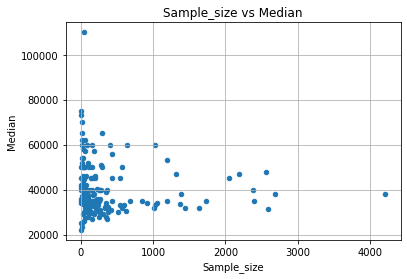

In [7]:
scatter_plot('Sample_size', 'Median')

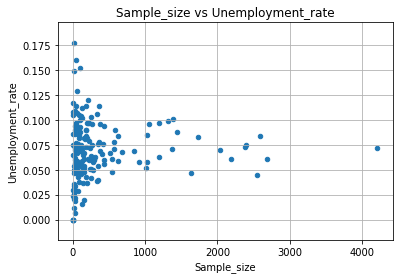

In [8]:
scatter_plot('Sample_size', 'Unemployment_rate')

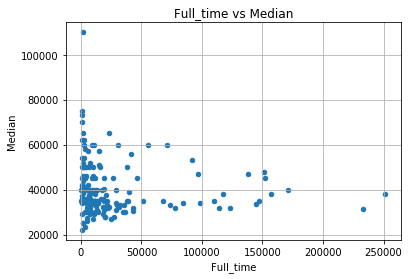

In [9]:
scatter_plot('Full_time', 'Median')

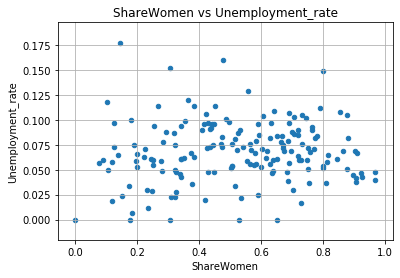

In [10]:
scatter_plot('ShareWomen', 'Unemployment_rate')

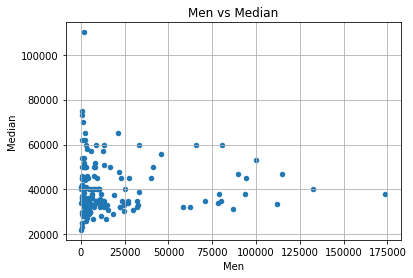

In [11]:
scatter_plot('Men', 'Median')

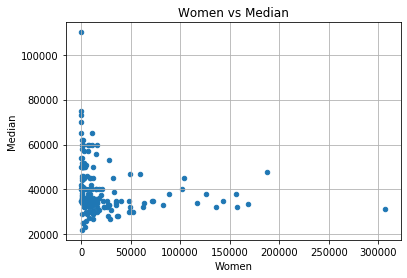

In [12]:
scatter_plot('Women', 'Median')

From these plots, it seems that:
* Students from majors with a larger sample size do not tend to make more money than the others.
* People who graduated with majors having a lot of female students tend to make less money than those with majors having a lot of male students.
* The median salary tends to decrease when the number of full-time employees increases.

### Histograms

We now show some histograms to visualize the distribution of values in relevent columns.

In [13]:
def histo(column, bins=10, range=None):
    '''
    histogram of the column 'column' for the recent_grads dataframe
    
    column: string
    bins: int 
    range: doublet of ints or floats, or None
    '''
    
    ax = recent_grads[column].hist(bins=bins, range=range)
    ax.set_title(column)
    plt.show()

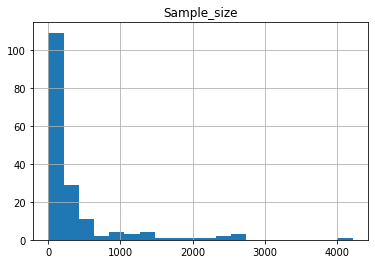

In [14]:
histo('Sample_size', 20)

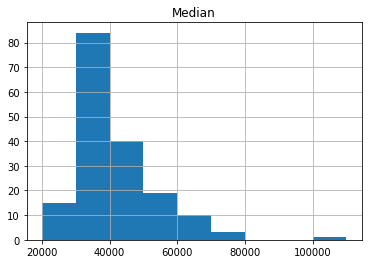

In [15]:
histo('Median', bins=9, range=(20000,110000))

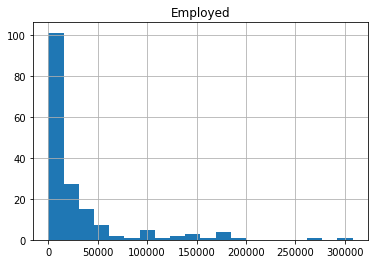

In [16]:
histo('Employed', 20)

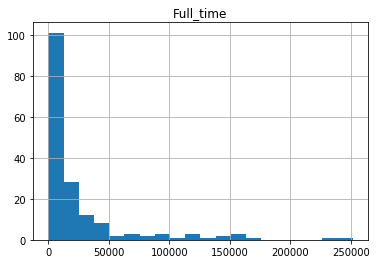

In [17]:
histo('Full_time', 20)

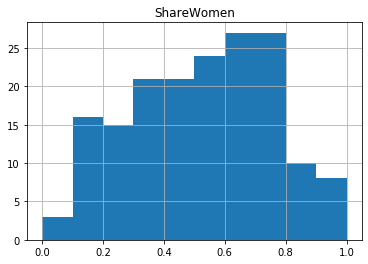

In [18]:
histo('ShareWomen',range=(0,1))

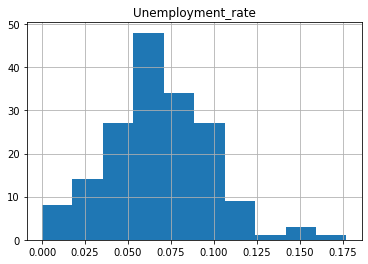

In [19]:
histo('Unemployment_rate')

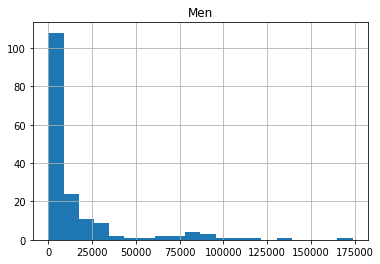

In [20]:
histo('Men',20)

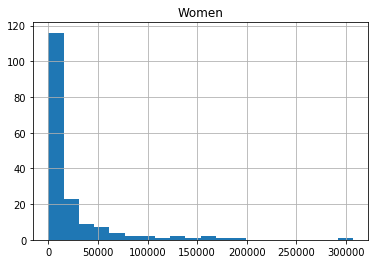

In [21]:
histo('Women',20)

From these plots, it seems that:
* Approximately half of majors have more men than women. 
* Three majors have less than 10% of women, and eight have less than 10% men.
* The most common median salary range is \\$30000 to \\$40000.
* The most common unemployment rate range is 0.05 to 0.075.

### Scatter Matrix Plots

To get a better idea of the relations between the values in different columns, let us show some scatter matrix plots. 
We will use the `scatter_matrix` function from the `pandas.plotting` module.
We also show correlation matrices using `seaborn` to get a numerical estimate of the correlations between the represented variables.

In [22]:
from pandas.plotting import scatter_matrix
import seaborn as sns

def scatter_matrix_and_corr_map(l_columns, figsize=(6,6)):
    '''
    plot a scatter matrix and correlation map for the columns in l_columns of
    the 'recent_grads' dataset
    
    l_columns: list of strings
    figsize: doublet of integers
    '''
    scatter_matrix(recent_grads[l_columns], figsize=figsize)
    plt.show()
    corr = recent_grads[l_columns].corr()
    sns.heatmap(corr, vmin=-1, vmax=1, cmap='coolwarm', square=True, annot=True)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()

We first visualize the relation between the `Sample_size` and `Median` columns: 

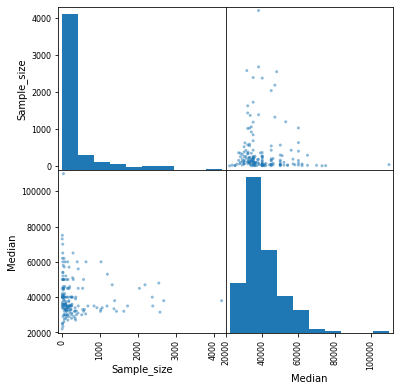

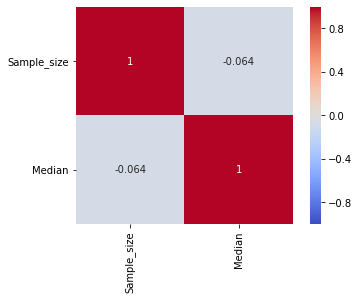

In [23]:
scatter_matrix_and_corr_map(['Sample_size', 'Median'])

There seems to be no significant correlation between them. 
Let us now add the `Unemployment_rate` column: 

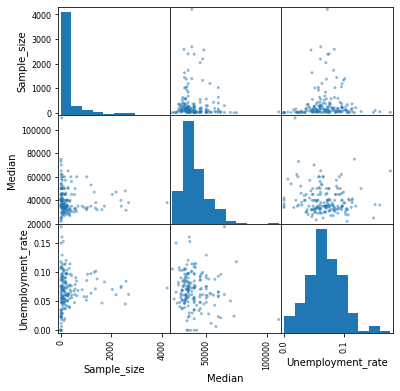

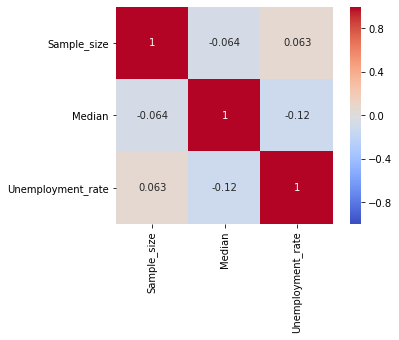

In [24]:
scatter_matrix_and_corr_map(['Sample_size', 'Median', 'Unemployment_rate'])

There seems to be no clear relation between any two of these variables, although we notice a small negative correlation between the median salary and unemployment rate. 
Let us do the same for the `Men` and `Women` columns to see if the same majors are popular among them.

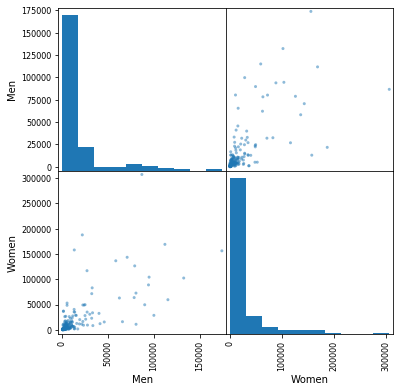

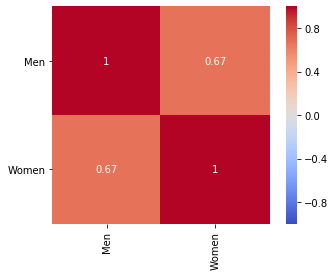

In [25]:
scatter_matrix_and_corr_map(['Men', 'Women'])

There is a significant correlation between these two columns. 
This indicates that **majors which are popular among one gender tend to also be popular among the other**.

To see the relation between the gender distribution and median earnings, let us plot the scatter matrix and correlation map for the `ShareWomen` and `Median` columns.

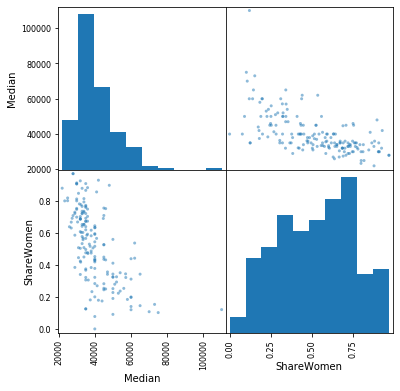

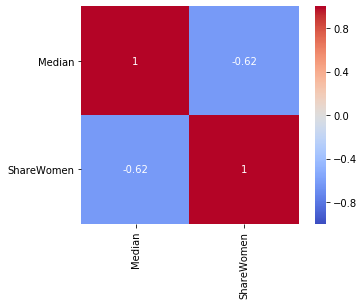

In [26]:
scatter_matrix_and_corr_map(['Median', 'ShareWomen'])

There is a significant negative correlations between the two variables, indicating that **majors with more women tend to lead to lower earnings**. 

Let us do the same for the `Full_time` and `Median` columns.

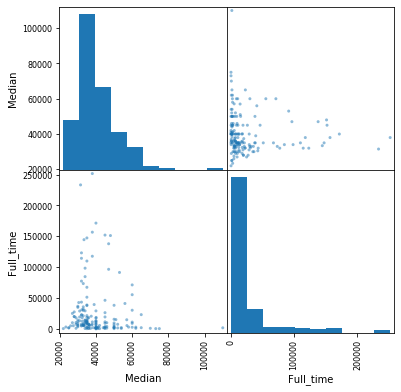

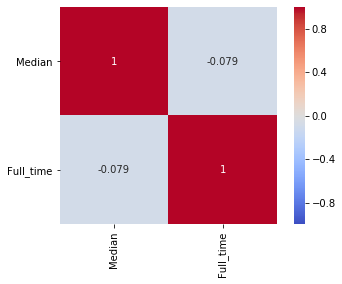

In [27]:
scatter_matrix_and_corr_map(['Median', 'Full_time'])

There is **no significant correlation between these variables**. 

Finally, let us do the same for the `Total` and `Median` columns.

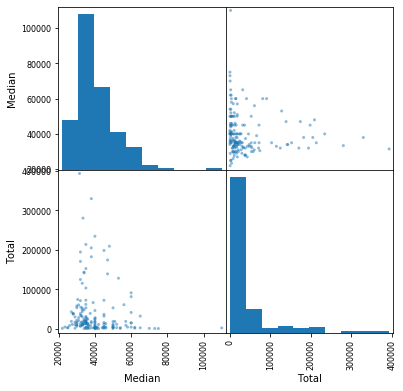

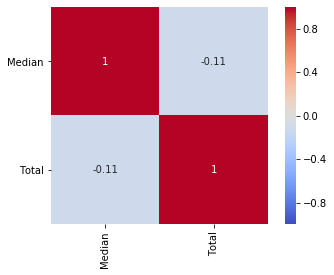

In [28]:
scatter_matrix_and_corr_map(['Median', 'Total'])

There is a very small negative correlation, which may well not be significant.

### Bar plots

Let us further explore the dataset by plotting a few bar plots. 
We first compare the number of men and women in the first and last 10 rows. 
(Rows are ordered by median earnings, with the first rows corresponding to the highest earnings.)

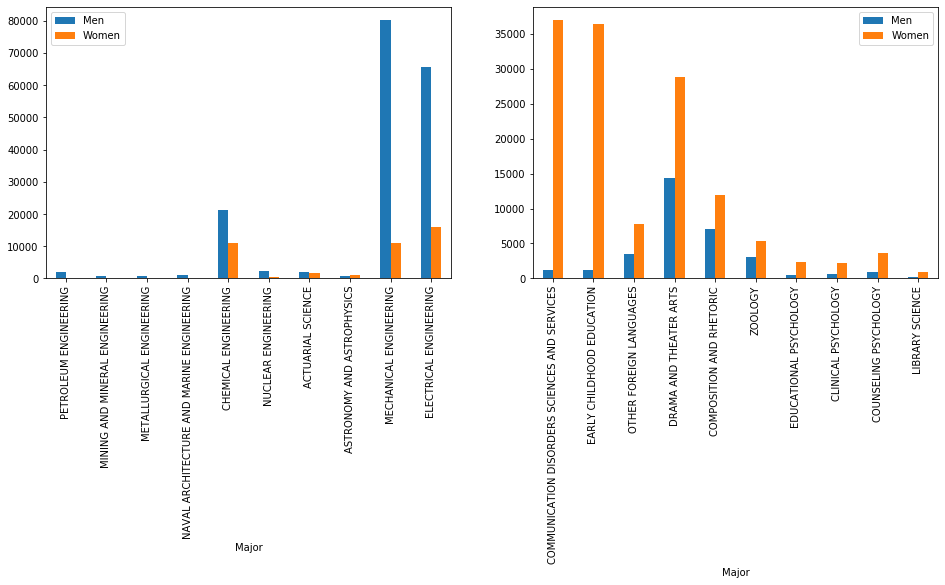

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
recent_grads[:10].plot.bar(x='Major', y=['Men','Women'], ax=axes[0])
recent_grads[-10:].plot.bar(x='Major', y=['Men','Women'], ax=axes[1])
plt.show()

We notice that **the 10 majors leading to the highest median salaries have significantly more men than women, while the 10 majors leading to the lowest median salaries have significantly more women than men**.

Let us now plot the unemployment rate for the first and last 10 rows.

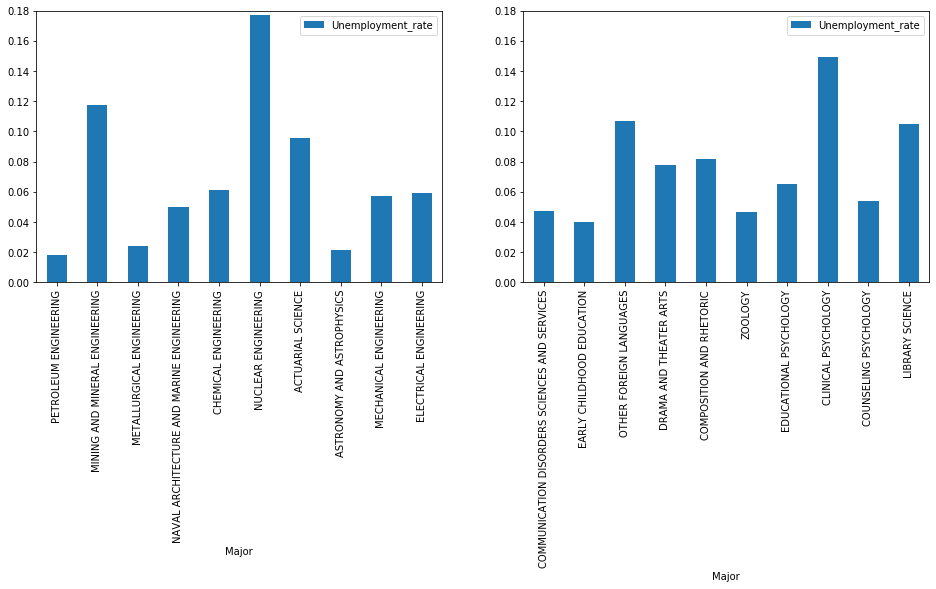

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
axes[0].set_ylim(0,0.18) # to ensure the two plots are on the same scale
axes[1].set_ylim(0,0.18)
recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate', ax=axes[0])
recent_grads[-10:].plot.bar(x='Major', y='Unemployment_rate', ax=axes[1])
plt.show()

There seems to be no significant difference in the unemplyment rate between the first and last ten rows. 
To check this more precisely, let us print the averages and standard errors.

In [31]:
first_ten_ave = recent_grads['Unemployment_rate'][:10].mean()
# sample standard error: standard deviation / sqrt(number of elements - 1)
first_ten_ste = recent_grads['Unemployment_rate'][:10].std() / 3 

last_ten_ave = recent_grads['Unemployment_rate'][-10:].mean()
last_ten_ste = recent_grads['Unemployment_rate'][-10:].std() / 3 

phrase = 'Average unemployment rate for the {} 10 lines: {:.3f} ± {:.3f}'
print(phrase.format('first', first_ten_ave, first_ten_ste))
print(phrase.format('last', last_ten_ave, last_ten_ste))

# compute the z-score for the difference
from math import sqrt
z_score = (last_ten_ave - first_ten_ave) / sqrt(first_ten_ste**2 + last_ten_ste**2)
print('z-score for the difference: {:.2f}'.format(z_score))

Average unemployment rate for the first 10 lines: 0.068 ± 0.017
Average unemployment rate for the last 10 lines: 0.077 ± 0.012
z-score for the difference: 0.45


The difference between the two mean values has a z-score smaller than 0.5. 
It thus does not seem statistically significant. 
We conclude that, **although the last 10 majors lead to significantly lower median earnings than the first 10 ones, their students do not have significantly higher chances of being unemployed**.

### Statistical significance of the correlations

We now want to estimate whether the correlation coefficients computed above are statistically significant. 
To this end, we compute their uncertainty using a bootstrap method implemented in the library `correlation.so`. 
(The code below should work on Linux. 
On other operating systems, the file `correlation.c` should be compiled as a shared library and the extension `.so` in the cell below replaced by the relevent one.) 
The bootstrap method involves a (pseudo-)random reshufling of the rows (with replacements). 
The code below is thus (pseudo-)random, and will give slightly different results each time it is run.

In [32]:
import ctypes as ct
import numpy as np

# C library with the bootstrap method
libc = ct.CDLL('../C/correlation.so')

# types of the arguments and return value for the function to calculate the 
# correlation coefficient
libc.corr.argtypes = [np.ctypeslib.ndpointer(dtype='double'), 
                      np.ctypeslib.ndpointer(dtype='double'), 
                      ct.c_int]
libc.corr.restype = ct.c_double

# types of the arguments and return value for the function to calculate the 
# standard deviation of the correlation coefficient
libc.std_corr.argtypes = [np.ctypeslib.ndpointer(dtype='double'), 
                          np.ctypeslib.ndpointer(dtype='double'), 
                          ct.c_int, 
                          ct.c_int]
libc.std_corr.restype = ct.c_double

# Python wrapper: correlation coefficient
def corr_coeff(x,y):
    '''
    Computes the correlation coefficient between x and y.
    If they have different lengths, the longer array is truncated.
    
    return type: float
    
    x: numpy array of float64
    y: numpy array of float64
    '''
    length = min([len(x), len(y)])
    return libc.corr(x, y, length)

# Python wrapper: standard deviation of the correlation coefficient
def std_corr_coeff(x,y):
    '''
    Computes the standard deviation for the correlation coefficient between 
    x and y.
    If they have different lengths, the longer array is truncated.
    
    return type: float
    
    x: numpy array of float64
    y: numpy array of float64
    '''
    length = min([len(x), len(y)])
    return libc.std_corr(x, y, length, length)

def corr_and_error(dframe, column1, column2):
    '''
    Computes the correlation coefficient between the values in columns column1 
    and column2 of the dataframe dframe and its standard deviation.
    The two columns are assumed to contain numeric values only.
    
    dframe: pandas dataframe
    column1: string
    column2: string
    '''
    x = np.array(dframe[column1], dtype='float64')
    y = np.array(dframe[column2], dtype='float64')
    return corr_coeff(x,y), std_corr_coeff(x,y)

# function to print the result in a self-explanatory way
def print_corr_and_error(dframe, column1, column2):
    phrase = 'The correlation coefficient between columns {} and {} is {:.2g} ± {:.2g}.'
    corr, std_corr = corr_and_error(dframe, column1, column2)
    print(phrase.format(column1, column2, corr, std_corr))

We now use the function `print_corr_and_error` to determine which correlations are statistically significant. 
We will consider that *a correlation is significant if the correlation coefficient is larger than three times its standard deviation in absolute value*.

In [33]:
print_corr_and_error(recent_grads, 'Sample_size', 'Median')
print_corr_and_error(recent_grads, 'Sample_size','Unemployment_rate')
print_corr_and_error(recent_grads, 'Median','Unemployment_rate')
print_corr_and_error(recent_grads, 'Men', 'Women')
print_corr_and_error(recent_grads,'Median', 'ShareWomen')
print_corr_and_error(recent_grads,'Median', 'Full_time')
print_corr_and_error(recent_grads,'Median', 'Total')

The correlation coefficient between columns Sample_size and Median is -0.064 ± 0.048.
The correlation coefficient between columns Sample_size and Unemployment_rate is 0.063 ± 0.05.
The correlation coefficient between columns Median and Unemployment_rate is -0.12 ± 0.095.
The correlation coefficient between columns Men and Women is 0.67 ± 0.064.
The correlation coefficient between columns Median and ShareWomen is -0.62 ± 0.039.
The correlation coefficient between columns Median and Full_time is -0.079 ± 0.049.
The correlation coefficient between columns Median and Total is -0.11 ± 0.047.


We ran the above cell several times to make sure the variations in the values of the standard deviations do not change the results.
According to the above definition, there is 
* **a significant positive correlation between the numbers of men and women in each major**,
* **a significant negative correlation between the share of women and the median earnings**.

<font style="color:rgb(0,100,255)"><b> To do: </b><ul>
    <li> make box plots to study the distribution of median salaries and unemployment rates </li>
    <li> complement scatter plots showing high densities with hexagonal bin plos </li>
    <li> plot and study the full correlation map </li>
    <li> check the above conclusions using numerical metrics </li>
    <li> determine the “best” major using different criteria </li>
</ul></font>